## Objective: 
The objective of this assignment is to assess students' understanding of batch normalization in artificial neural networks (ANN) and its impact on training performance.

### Q1. Concepts

#### 1. Explain the concept of batch normalization in the context of Artificial Neural Networks.

Batch normalization is a technique used in artificial neural networks to improve training speed and stability. It normalizes the inputs to a layer for each mini-batch, ensuring that the mean output of the layer is close to 0 and the standard deviation is close to 1. This helps to mitigate the issues of internal covariate shift, where the distribution of inputs to a layer changes during training, leading to slower convergence.

#### 2. Describe the benefits of using batch normalization during training.

- **Faster Convergence**: By normalizing the inputs, batch normalization allows for higher learning rates, which can speed up training.
- **Reduced Sensitivity to Weight Initialization**: Batch normalization reduces the dependence on careful weight initialization, making it easier to train deep networks.
- **Improved Gradient Flow**: It helps to alleviate the vanishing gradient problem by maintaining a stable distribution of inputs to the activation functions.
- **Regularization Effect**: It introduces some noise during training, which can act as a form of regularization, reducing overfitting.

#### 3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

Batch normalization consists of two main steps:

1. **Normalization Step**: For each mini-batch, compute the mean and variance of the layer’s inputs:
   - Mean: μ = (1/m) * Σ(x_i) for i from 1 to m
   - Variance: σ² = (1/m) * Σ((x_i - μ)²) for i from 1 to m
   - Normalize: 
     \[
     \hat{x}_i = \frac{x_i - μ}{\sqrt{σ² + ε}}
     \]
   where ε is a small constant added for numerical stability.

2. **Learnable Parameters**: After normalization, the output is scaled and shifted using learnable parameters γ (scale) and β (shift):
   \[
   y_i = γ\hat{x}_i + β
   \]
   These parameters allow the network to recover the original distribution if needed.




### Q2. Implementation

#### 1. Choose a dataset of your choice (e.g., MNIST, CIFAR-10) and preprocess it.

For this example, let's use the MNIST dataset. The preprocessing steps typically include:
- Normalizing pixel values to the range [0, 1].
- Reshaping the data if necessary (e.g., adding a channel dimension).

In [3]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


2. Implement a simple feedforward neural network using any deep learning framework/library (e.g., TensorFlow, PyTorch).

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Define a simple feedforward neural network
model_no_bn = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_no_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3. Train the neural network on the chosen dataset without using batch normalization.

In [5]:
# Train the model without batch normalization
history_no_bn = model_no_bn.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8759 - loss: 0.4329 - val_accuracy: 0.9537 - val_loss: 0.1551
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9636 - loss: 0.1252 - val_accuracy: 0.9708 - val_loss: 0.0953
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9754 - loss: 0.0812 - val_accuracy: 0.9712 - val_loss: 0.0951
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9828 - loss: 0.0582 - val_accuracy: 0.9759 - val_loss: 0.0791
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9873 - loss: 0.0433 - val_accuracy: 0.9762 - val_loss: 0.0797
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9905 - loss: 0.0325 - val_accuracy: 0.9780 - val_loss: 0.0730
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9912 - loss: 0.0278 - val_accuracy: 0.9737 - val_loss: 0.0862
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9942 - loss: 0.0202 - 

4. Implement batch normalization layers in the neural network and train the model again.

In [6]:
from keras.layers import BatchNormalization

# Define a feedforward neural network with batch normalization
model_with_bn = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])
model_with_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with batch normalization
history_with_bn = model_with_bn.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8882 - loss: 0.3794 - val_accuracy: 0.9579 - val_loss: 0.1395
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9626 - loss: 0.1250 - val_accuracy: 0.9717 - val_loss: 0.0967
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9740 - loss: 0.0884 - val_accuracy: 0.9725 - val_loss: 0.0869
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9761 - loss: 0.0711 - val_accuracy: 0.9761 - val_loss: 0.0787
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9802 - loss: 0.0626 - val_accuracy: 0.9746 - val_loss: 0.0793
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9840 - loss: 0.0523 - val_accuracy: 0.9739 - val_loss: 0.0826
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9852 - loss: 0.0444 - val_accuracy: 0.9771 - val_loss: 0.0761
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9870 - loss: 0.0414 

5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization.

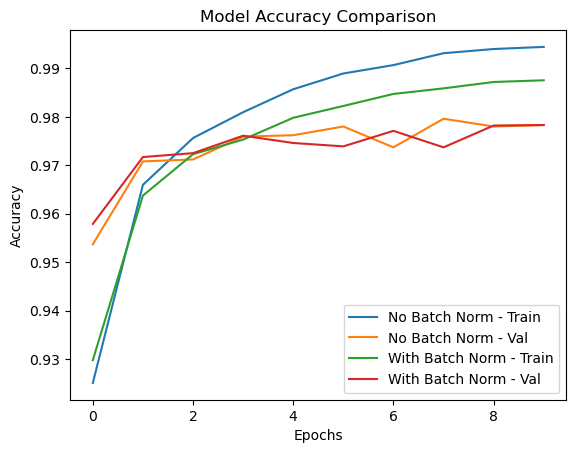

In [7]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history_no_bn.history['accuracy'], label='No Batch Norm - Train')
plt.plot(history_no_bn.history['val_accuracy'], label='No Batch Norm - Val')
plt.plot(history_with_bn.history['accuracy'], label='With Batch Norm - Train')
plt.plot(history_with_bn.history['val_accuracy'], label='With Batch Norm - Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Comparison')
plt.show()


6. Discuss the impact of batch normalization on the training process and the performance of the neural network.
Batch normalization typically leads to:

Higher accuracy in fewer epochs compared to networks without batch normalization.
More stable training dynamics and reduced fluctuations in training loss.
Increased robustness to different weight initializations and learning rates.

Q3. Experimentation and Analysis
1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance.
You can modify the batch size parameter during training and observe changes in convergence speed and final accuracy. For example:

### Q3. Experimentation and Analysis

#### 1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance.

To assess the impact of different batch sizes on training dynamics and performance, we will train the neural network model using varying batch sizes and observe the changes in training accuracy, validation accuracy, and loss. Below is an example of how to conduct this experiment:

Training with batch size: 16


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with batch size: 32
Training with batch size: 64
Training with batch size: 128


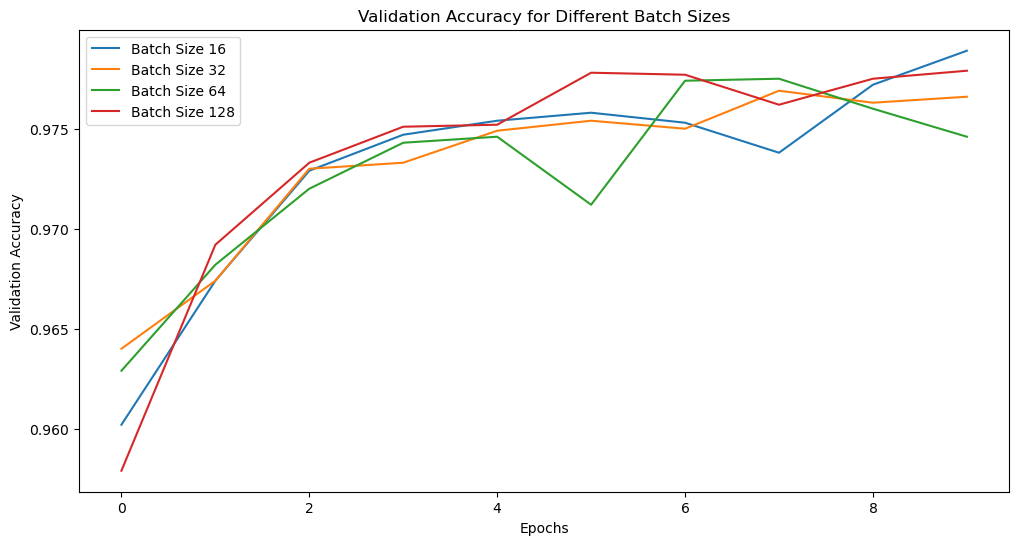

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization
from keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Function to create and train the model
def train_model(batch_size):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)
    return history

# Experiment with different batch sizes
batch_sizes = [16, 32, 64, 128]
results = {}

for batch_size in batch_sizes:
    print(f'Training with batch size: {batch_size}')
    results[batch_size] = train_model(batch_size)

# Plot and compare results for different batch sizes
plt.figure(figsize=(12, 6))
for batch_size, history in results.items():
    plt.plot(history.history['val_accuracy'], label=f'Batch Size {batch_size}')
    
plt.title('Validation Accuracy for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


In this experiment:

We trained the model for a fixed number of epochs (10 in this case) using different batch sizes: 16, 32, 64, and 128.
The training dynamics, such as validation accuracy, were observed and plotted for comparison.
Observations:

As the batch size increases, the training dynamics may change. Smaller batch sizes might lead to more fluctuations in the validation accuracy due to higher variance in the gradient estimates, while larger batch sizes can stabilize the training process.
Larger batch sizes can lead to faster convergence but might also result in lower generalization performance if the model converges too quickly to a suboptimal solution.
2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.
Advantages:

Faster Convergence: Batch normalization often leads to faster convergence during training, allowing the model to achieve higher accuracy in fewer epochs. This is particularly beneficial when training deep networks.
Improved Gradient Flow: By normalizing the inputs to each layer, batch normalization helps mitigate the vanishing gradient problem, enabling deeper networks to learn effectively.
Robustness to Initialization: It reduces the sensitivity to weight initialization, making it easier to train models with less careful setup.
Regularization Effect: The noise introduced during batch normalization can have a regularization effect, which helps reduce overfitting and improves generalization on unseen data.
Limitations:

Computation Overhead: Batch normalization introduces additional computations during training and inference, which can slow down the overall process. This is especially true for very large models or in resource-constrained environments.
Dependence on Batch Size: The effectiveness of batch normalization can be diminished when using small batch sizes, as the estimates of the mean and variance may be noisy. This can lead to instability in the training process.
Not Always Beneficial: In some architectures, particularly certain types of recurrent neural networks (RNNs) or in scenarios where the input distribution is highly variable, batch normalization may not yield significant benefits and could even hinder performance.